# Exercise 3 | TKO_7092 Evaluation of Machine Learning Methods 2023
## deadline: 15.2.2023 - 23:59

Regarding any questions about this exercise, please contact course assistant Jonne Pohjankukka (jjepoh@utu.fi)

********************************************

Student name: Jeremias Shadbolt

Student number: 1900386

Student email: jrshad@utu.fi

********************************************

## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=5 (5NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 5-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points): 

- input.csv, contains the 75 predictor features. 
- output.csv, contains the water permebility values. 
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points. 

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv). 

#### 2. Perform spatial leave-one-out cross-validation with 5NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 for help). Estimate the water permeability prediction performance (using 5NN model and C-index) with the following distance parameter values: d = 0, 10, 20, ..., 250 (that is, 10 meter intervals from 0m to 250m). 

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following: 

- Your own implementation of the spatial leave-one-out cross-validation for the current task. Remember to also take advantage of earlier exercises (e.g. C-index). For the 5-nearest neighbor and Euclidean distance calculation you can use third-party libraries (e.g. Scikit-learn) if you want. Also, try to follow good programming practices and add comments to relevant parts of your code explaining what you are doing and why.


- Plot of the graph C-index vs. distance parameter value. 


<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### Import necessary libraries

In [1]:
# In this cell, import all the libraries that you need. For example: 
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import matplotlib.pyplot as plt

### Read in the datasets

In [2]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).
#
# Note that the coordinates are in EUREF-TM35FIN format, so you 
# can use the Euclidean distance to calculate the distance between two coordinate points.  

input_data = np.genfromtxt('input.csv', delimiter = ',')
output_data = np.genfromtxt('output.csv', delimiter = ',')
coordinates_data = np.genfromtxt('coordinates.csv', delimiter = ',')

In [3]:
print(f"Input shape: {input_data.shape}")
print(f'Output shape: {output_data.shape}')
print(f'Coordinates shape: {coordinates_data.shape}')

Input shape: (1691, 75)
Output shape: (1691,)
Coordinates shape: (1691, 2)


### Standardization of the predictor features (input.csv)

In [4]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance. 
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this. 

input_data = StandardScaler().fit_transform(input_data)

### Functions

In [5]:
# Include here all the functions (for example the C-index-function) that you need in order to implement the task.

In [6]:
# C_index function from prev. exercises
def cindex(true_labels, pred_labels):
    """Returns C-index between true labels and predicted labels"""  
    n = 0
    h_num = 0 
    for i in range(0, len(true_labels)):
        t = true_labels[i]
        p = pred_labels[i]
        for j in range(i+1, len(true_labels)):
            nt = true_labels[j]
            np = pred_labels[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    cindex = h_num / n
    return cindex

In [7]:
# spatial leave-one-out cross-validation

# Towards Data Science was used to further explain the concept: https://towardsdatascience.com/spatial-cross-validation-using-scikit-learn-74cb8ffe0ab9
def sloocv(X, y, distance_matrix, model, delta):
    predictions = list()
    for i in range(len(X)):
        # get i as test set
        X_test = X[i].reshape(1, -1)
        
        # Training datasets derived from points where distance to the test point is greater than delta
        X_train = X[distance_matrix[i] > delta]
        y_train = y[distance_matrix[i] > delta]
        
        # train the model
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        predictions.append(prediction)
    # Calculate and return the C-index score
    return cindex(y, predictions)

### Results for spatial leave-one-out cross-validation with 5-nearest neighbor regression model

In [8]:
# In this cell, run your script for the Spatial leave-One-Out cross-validation 
# with 5-nearest neighbor regression model and visualize the results as 
# requested in the task assignment.
knn = KNeighborsRegressor(n_neighbors = 5, metric = 'euclidean')

# Euclidean distance, documentation referred: https://docs.scipy.org/doc/scipy/reference/spatial.distance.html
distance_matrix = distance.cdist(coordinates_data, coordinates_data, metric = 'euclidean')

# Verify something happened
display(distance_matrix[:5])

# variables required for testing
delta_values = range(0, 251, 10)
cindexes = list()

array([[    0.        , 24920.72430729, 25266.97449241, ...,
        64022.74986284, 64426.31139527, 64580.18581577],
       [24920.72430729,     0.        ,   540.83269132, ...,
        53794.14466278, 53906.56824544, 54039.06827472],
       [25266.97449241,   540.83269132,     0.        , ...,
        53311.7482362 , 53420.61025484, 53552.74409402],
       [25266.97449241,   540.83269132,     0.        , ...,
        53311.7482362 , 53420.61025484, 53552.74409402],
       [25376.76299294,   672.01190466,   134.53624047, ...,
        53210.80341434, 53318.35425067, 53450.35172943]])

In [9]:
# results using spatial LOOCV

for delta in delta_values:
    print(f"Current delta: {delta}")
    c_index = sloocv(input_data, output_data, distance_matrix, knn, delta)
    cindexes.append(c_index)

Current delta: 0
Current delta: 10
Current delta: 20
Current delta: 30
Current delta: 40
Current delta: 50
Current delta: 60
Current delta: 70
Current delta: 80
Current delta: 90
Current delta: 100
Current delta: 110
Current delta: 120
Current delta: 130
Current delta: 140
Current delta: 150
Current delta: 160
Current delta: 170
Current delta: 180
Current delta: 190
Current delta: 200
Current delta: 210
Current delta: 220
Current delta: 230
Current delta: 240
Current delta: 250


### Interpretation of the results

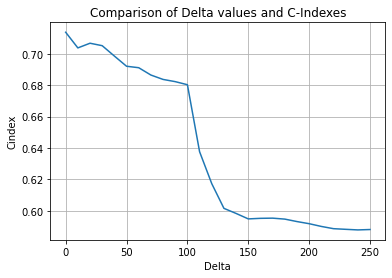

In [10]:
# In this cell, give a brief commentary on the results, what happens to the prediction 
# performance as the prediction distance increases?
plt.plot(delta_values, cindexes)
plt.xlabel('Delta')
plt.ylabel('Cindex')
plt.grid()
plt.title('Comparison of Delta values and C-Indexes')
plt.show()

C-Index seems to be acceptable up until Delta value reaches > 100. When Delta > 100, accuracy drops dramatically which suggests that the larger the distance between known and unknown data points the lower the accuracy. Exactly as one would expect